In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import scipy
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\student-alcohol-consumption\student-mat.csv",sep=",")
data2 = pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\student-alcohol-consumption\student-por.csv",sep=",")
data = [data1,data2]
data=pd.concat(data)

In [3]:
data=data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [4]:
grades=["G1","G2","G3"]
norm=[]
for i in grades:
    norm.append(scipy.stats.normaltest(data[i]))
for i in range(0,len(grades)):
    print(grades[i])
    print(norm[i])
    print('----------')

G1
NormaltestResult(statistic=18.735074390192455, pvalue=8.545358498523635e-05)
----------
G2
NormaltestResult(statistic=32.32198566499538, pvalue=9.580098861050945e-08)
----------
G3
NormaltestResult(statistic=73.59396661534839, pvalue=1.0453776212925763e-16)
----------


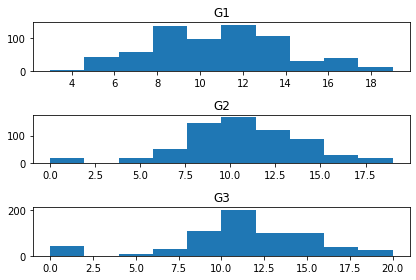

In [5]:
i = 1
for w in grades:
    plt.subplot(3, 1, i)
    plt.tight_layout()
    i += 1
    plt.hist(data[w])
    plt.title(w)

In [6]:
corr = data.corr()
for a in corr.columns:
    for b in corr.index:
        if (a != b) and (abs(corr[a][b]) >= 0.75):
            print(a,b,'-->',corr[a][b])

G1 G2 --> 0.8414356603927251
G1 G3 --> 0.7965691040425612
G2 G1 --> 0.8414356603927251
G2 G3 --> 0.9135480717310741
G3 G1 --> 0.7965691040425612
G3 G2 --> 0.9135480717310741


In [7]:
def regression_explore(y,drop):
    Y = data[y]
    X = data.drop(drop, axis=1)
    X = pd.get_dummies(X)

    names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

    clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]
            
    print('Models performance in: ' + str(y))
    print('------------------------')
    for name, clf in zip(names, clf_list):
        print(name, end=': ')
        print(cross_val_score(clf, X, Y, cv=5).mean())
        
a = ['G3','G2','G1']
for i in a:
    regression_explore(i, a)
    print('\n')

Models performance in: G3
------------------------
DecisionTreeRegressor: -0.9594361226229834
LinearRegression: -0.08540573656473485
Ridge: -0.08312185996996861
Lasso: -0.0713203347237984


Models performance in: G2
------------------------
DecisionTreeRegressor: -1.1179795898764504
LinearRegression: 0.020267454904427273
Ridge: 0.022081636750409417
Lasso: -0.04571518781629256


Models performance in: G1
------------------------
DecisionTreeRegressor: -1.0531904178779805
LinearRegression: 0.06854822370337817
Ridge: 0.07020653872084662
Lasso: -0.05529239366709846




In [8]:
variables_explore = ['G2','G3']
for b in variables_explore:
    regression_explore(b,b)
    print('\n')

Models performance in: G2
------------------------
DecisionTreeRegressor: 0.6877918079113174
LinearRegression: 0.8347498958365043
Ridge: 0.8350908285689634
Lasso: 0.843387346555085


Models performance in: G3
------------------------
DecisionTreeRegressor: 0.5477683514173345
LinearRegression: 0.7976586396449088
Ridge: 0.7981603009432572
Lasso: 0.8245934862825953




Mean squared error: 3.63
Variance score: 0.71


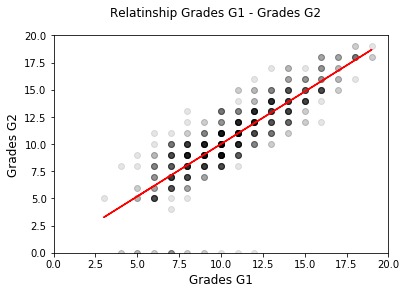

In [9]:
y = data['G2']
X = data['G1']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
fig = plt.figure()
plt.scatter(X,y, color='black', alpha=.1)
fig.suptitle('Relatinship Grades G1 - Grades G2', fontsize=12)
plt.xlabel('Grades G1', fontsize=12)
plt.ylabel('Grades G2', fontsize=12)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot(X,y_pred, color='red')

print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))

print('Variance score: %.2f' % linreg.score(X, y))

Mean squared error: 2.79
Variance score: 0.83


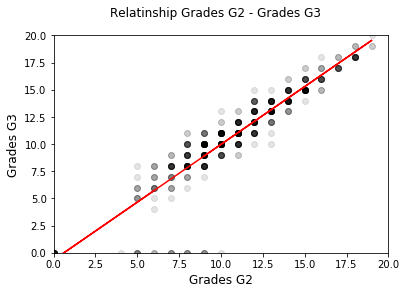

In [10]:
y = data['G3']
X = data['G2']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
fig = plt.figure()
plt.scatter(X,y, color='black', alpha=.1)
fig.suptitle('Relatinship Grades G2 - Grades G3', fontsize=12)
plt.xlabel('Grades G2', fontsize=12)
plt.ylabel('Grades G3', fontsize=12)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot(X,y_pred, color='red')

print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))

print('Variance score: %.2f' % linreg.score(X, y))